Missing Values in Columns for Clustering:
 Geo Join ID    0
Data Value     0
dtype: int64
Number of samples after dropping missing values: 16218


C:\Users\nalla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nalla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nalla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nalla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

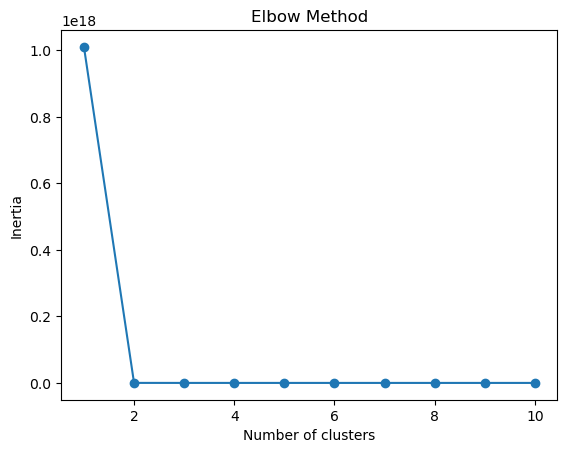

C:\Users\nalla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


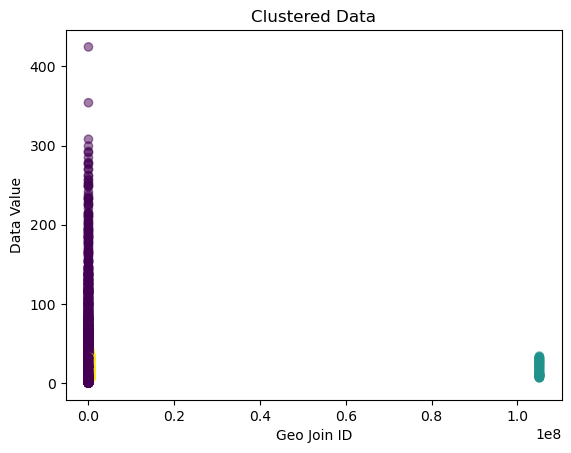

Mean Squared Error: 316.1529282338258


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Load the dataset
data = pd.read_csv(r'C:\Users\nalla\OneDrive\Desktop\air quality\Air_Quality.csv')

# Data Cleaning and Preparation
# Check for missing values in the columns needed for clustering
columns_for_clustering = ['Geo Join ID', 'Data Value']
missing_values = data[columns_for_clustering].isnull().sum()
print("Missing Values in Columns for Clustering:\n", missing_values)

# Drop rows with missing values in the columns needed for clustering
data.dropna(subset=columns_for_clustering, inplace=True)

# Check if there are samples available for clustering
if len(data) > 0:
    print("Number of samples after dropping missing values:", len(data))
    
# Clustering
# Choose features for clustering
X_clustering = data[['Geo Join ID', 'Data Value']]
    
# Determine the optimal number of clusters
inertia = []
for k in range(1, 11):
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_clustering)
inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

    # Based on the Elbow Method, select the optimal number of clusters
    optimal_clusters = 3  # Adjust this value based on the elbow plot
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_clustering)

    # Plot the clusters
    plt.scatter(X_clustering.iloc[:, 0], X_clustering.iloc[:, 1], c=clusters, cmap='viridis', alpha=0.5)
    plt.xlabel('Geo Join ID')
    plt.ylabel('Data Value')
    plt.title('Clustered Data')
    plt.show()

    # Initialize the OneHotEncoder
    onehot_encoder = OneHotEncoder()
    
    # Fit and transform the 'Time Period' column
    time_period_encoded = onehot_encoder.fit_transform(data['Time Period'].values.reshape(-1, 1)).toarray()

    # Extracting unique categories from the 'Time Period' column
    categories = onehot_encoder.categories_[0]

    # Creating column names for the one-hot encoded features
    feature_names = [f'Time_Period_{category}' for category in categories]

    # Creating a DataFrame for the one-hot encoded features with the extracted feature names
    time_period_df = pd.DataFrame(time_period_encoded, columns=feature_names)

    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    data = pd.concat([data, time_period_df], axis=1)

    # Drop the original 'Time Period' column
    data.drop('Time Period', axis=1, inplace=True)


    # Perform label encoding for categorical variables
    label_encoder = LabelEncoder()
    data['Geo Place Name'] = label_encoder.fit_transform(data['Geo Place Name'])

    # Select variables for fitting analysis
    X_fit = data.drop(['Data Value', 'Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Start_Date', 'Message'], axis=1)
    y_fit = data['Data Value']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_fit, y_fit, test_size=0.2, random_state=42)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
else:
    print("No samples available for clustering.")
    
    

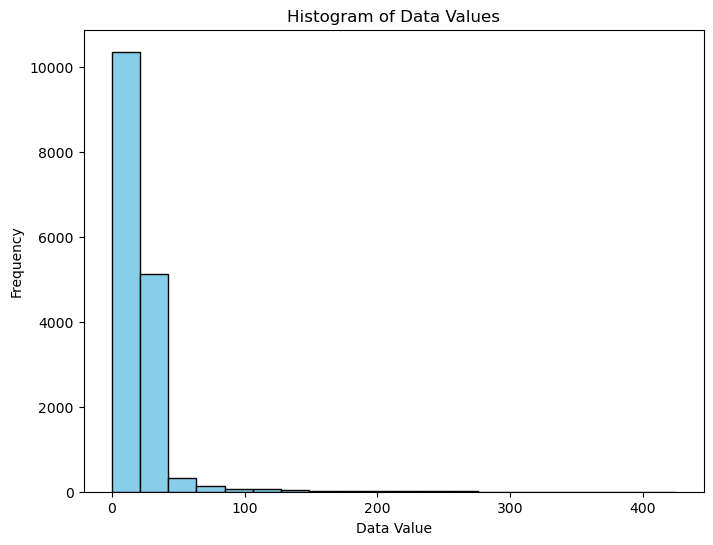

In [2]:
# Plot Histogram
plt.figure(figsize=(8,6))
plt.hist(data['Data Value'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data Values')
plt.show()


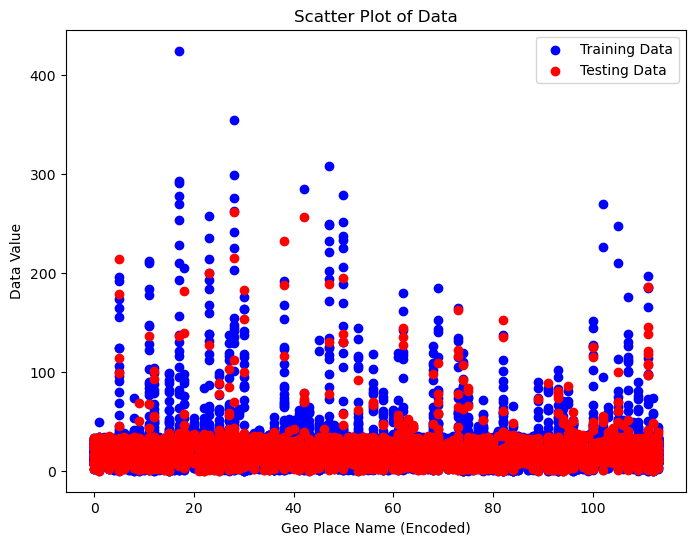

In [3]:
# Plot Scatter Graph
plt.figure(figsize=(8, 6))
plt.scatter(X_train['Geo Place Name'], y_train, color='blue', label='Training Data')
plt.scatter(X_test['Geo Place Name'], y_test, color='red', label='Testing Data')
plt.xlabel('Geo Place Name (Encoded)')
plt.ylabel('Data Value')
plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

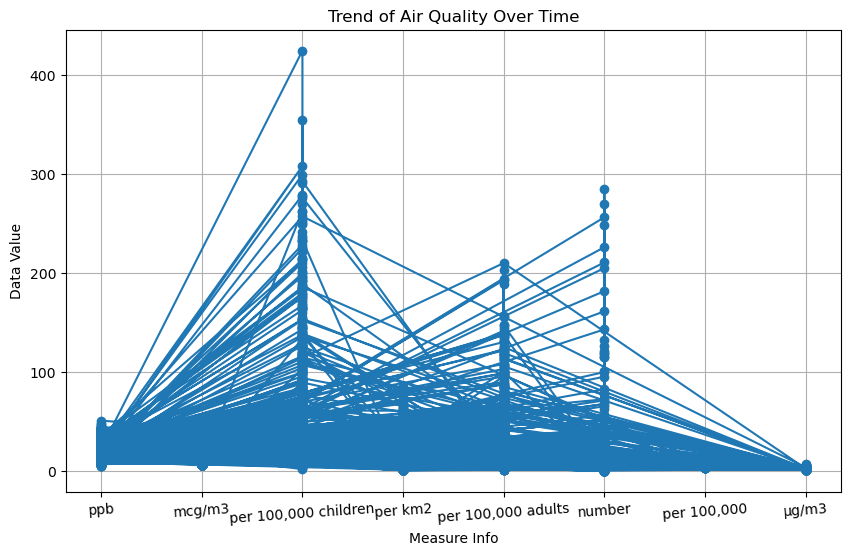

In [6]:
# Plot Line Graph
plt.figure(figsize=(10, 6))
plt.plot(data['Measure Info'], data['Data Value'], marker='o', linestyle='-')
plt.xlabel('Measure Info')
plt.ylabel('Data Value')
plt.title('Trend of Air Quality Over Time')
plt.xticks(rotation=4)
plt.grid(True)
plt.show()